<a href="https://colab.research.google.com/github/WinnieAnyoso/decision_tree_svm/blob/master/W8_IP_2020_Anyoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

a) Specifying the Data Analytic Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

The research problem is to figure out which important features(age, TSH, on_thyroxine e.t.c.) are more relevant to cheeck for when testing and predicitng the outcome for hypothyroid in individuals and also which model is best suited to make more accurate predictions

###b)Defining the Metric for Success 

This analysis requires us figure out which important features(age, TSH, on_thyroxine e.t.c.) are more relevant to cheeck for when testing and predicitng the outcome for hypothyroid in individuals and also which model is best suited to make more accurate predictions

We therefore need to identify the metrics(features) that are signifinant in determining hypothyroidsm and assess the key  factors that drive this and offer insights.

We will implement the solution by performing the respective analysis i.e. using 
Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

### c) Understanding the context

Hypothyroidism is when the thyroid is underactive. When thyroid hormone production drops, your body's processes slow down and change. Hypothyroidism can affect many different systems in your body. Hypothyroidism can affect your metabolism, mental functions, energy level, and bowel movements.

### d) Recording the Experimental Design

Below are the steps i took to implement this solution

1) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective. 

2) Reading the data: Reading our data with and aim to understand the variables and observations. 

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis.

5) EDA, the data was analysed and visualized.

6) Implementing the solution using Random Forest, Ada Boost and Support Vector Machine 

7) Challenged the solution.


### e) Data relevance

The data is a collection from the Nairobi Hospital that was conducted during a hypothyroidsm clinical camp which mainly focused on thyroid patients. 

This data is therefore relevant.

#1.Importing Libraries 

In [40]:
# 1. Importing libraries 
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings('ignore')

-All required libraries imported

#2.Reading the data 

In [41]:
# 2. reading the data
df = pd.read_csv('http://bit.ly/hypothyroid_data')
df.head(5)

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

- There are more categorical columns than numerical 

#3.Dataset exploration

In [42]:
# 3. Data set exploration
df.sample(4)

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
871      negative  46   F            f  ...            n    ?            y  20
361      negative   ?   F            f  ...            y   97            n   ?
3068     negative  28   F            t  ...            y  198            n   ?
131   hypothyroid  50   F            t  ...            y   60            n   ?

[4 rows x 26 columns]

- Some columns have columns with '?' values. This will be dealt with later. 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

- Before cleaning, the dataframe info indicates that all columns have the "object dtype". However, this is not true for all columns. 

In [44]:
df.describe().T  # T indicates transpose

count unique       top  freq
status                     3163      2  negative  3012
age                        3163     93         ?   446
sex                        3163      3         F  2182
on_thyroxine               3163      2         f  2702
query_on_thyroxine         3163      2         f  3108
on_antithyroid_medication  3163      2         f  3121
thyroid_surgery            3163      2         f  3059
query_hypothyroid          3163      2         f  2922
query_hyperthyroid         3163      2         f  2920
pregnant                   3163      2         f  3100
sick                       3163      2         f  3064
tumor                      3163      2         f  3123
lithium                    3163      2         f  3161
goitre                     3163      2         f  3064
TSH_measured               3163      2         y  2695
TSH                        3163    240         0   894
T3_measured                3163      2         y  2468
T3                         3163     70         ?   695
TT4_measured               3163      2         y  2914
TT4                        3163    269         ?   249
T4U_measured               3163      2         y  2915
T4U                        3163    159         ?   248
FTI_measured               3163      2         y  2916
FTI                        3163    281         ?   247
TBG_measured               3163      2         n  2903
TBG                        3163     53         ?  2903

In [45]:
## 
df.shape

(3163, 26)

- Data contains 3163 rows and 26 columns 

#4.Data Cleaning 

In [46]:
# checking for null values

df.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

- There are no null values 

In [47]:
# checking for duplicated records

df.duplicated().any()


True

- There are duplicate records



In [48]:
# checking for the number of duplicate records. 

df.duplicated().sum()

77

- There are 77 duplicated reords

In [49]:
# DROPPING duplicates 
df = df.drop_duplicates(keep = 'first')
df.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [50]:
# checking the shape of the dataframe to confirm that the duplicates 
# were dropped 
df.shape

(3086, 26)

- Duplicates have been dropped. The number of rows has reduced by 77 from 3163 to 3086

In [51]:
# CARDINALITY TEST 

# checking for the number of unique values in each column
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [52]:
# checking for unique values in each column 

for i in df.columns:
  
  print(i)
  print(df[i].unique(),'\n\n')

status
['hypothyroid' 'negative'] 


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93'] 


sex
['M' 'F' '?'] 


on_thyroxine
['f' 't'] 


query_on_thyroxine
['f' 't'] 


on_antithyroid_medication
['f' 't'] 


thyroid_surgery
['f' 't'] 


query_hypothyroid
['f' 't'] 


query_hyperthyroid
['f' 't'] 


pregnant
['f' 't'] 


sick
['f' 't'] 


tumor
['f' 't'] 


lithium
['f' 't'] 


goitre
['f' 't'] 


TSH_measured
['y' 'n'] 


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126'

- From above, we realize that: Age, TSH, T3, T4U, FTI, TBG are numerical columns and the rest are categorical columns. 

In [53]:
df['status'].value_counts()

negative       2945
hypothyroid     141
Name: status, dtype: int64

- From above, we find out that there are 141 patients that had hypothyroid. 

In [54]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [55]:
# checking info on the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        3086 non-null   object
 2   sex                        3086 non-null   object
 3   on_thyroxine               3086 non-null   object
 4   query_on_thyroxine         3086 non-null   object
 5   on_antithyroid_medication  3086 non-null   object
 6   thyroid_surgery            3086 non-null   object
 7   query_hypothyroid          3086 non-null   object
 8   query_hyperthyroid         3086 non-null   object
 9   pregnant                   3086 non-null   object
 10  sick                       3086 non-null   object
 11  tumor                      3086 non-null   object
 12  lithium                    3086 non-null   object
 13  goitre                     3086 non-null   object
 14  TSH_meas

In [56]:
# repalcing the "?" values with NaN values 
df.replace(to_replace='?', inplace=True, value=np.NaN)


In [57]:
# checking to see whether the '?'was replaced
df.head(2).T   # T for Transpose

0            1
status                     hypothyroid  hypothyroid
age                                 72           15
sex                                  M            F
on_thyroxine                         f            t
query_on_thyroxine                   f            f
on_antithyroid_medication            f            f
thyroid_surgery                      f            f
query_hypothyroid                    f            f
query_hyperthyroid                   f            f
pregnant                             f            f
sick                                 f            f
tumor                                f            f
lithium                              f            f
goitre                               f            f
TSH_measured                         y            y
TSH                                 30          145
T3_measured                          y            y
T3                                0.60         1.70
TT4_measured                         y            y
TT4                                 15           19
T4U_measured                         y            y
T4U                               1.48         1.13
FTI_measured                         y            y
FTI                                 10           17
TBG_measured                         n            n
TBG                                NaN          NaN

In [58]:
# FEATURE ENGINEERING

# concverting data types 


# from above, we realized that there were categorical columns and numerical columns 
# that were classified as odjects, we need to rectify that. 

numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

categorical_cols = ['status', 'sex','on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

       
for col in numeric_cols:
  df[[col]] = df[[col]].apply(pd.to_numeric)

df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [59]:
# checking for null vslues once more since we replaced '?'with Nan values 
df.isnull().any()

status                       False
age                           True
sex                           True
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                           True
T3_measured                  False
T3                            True
TT4_measured                 False
TT4                           True
T4U_measured                 False
T4U                           True
FTI_measured                 False
FTI                           True
TBG_measured                 False
TBG                           True
dtype: bool

- We realize that some of these columns contain null values.

In [60]:
# Checking for the number of null values in each column 
df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [61]:
# To avoid instances of overfitting or undefitting or variance biase, I chose to replace all NaN values with 0 for
# numerical columns and  'null' for categorical to indicate that no value was input during data recording or collection
for col in numeric_cols:
  df.fillna(0, inplace = True) 

for col in categorical_cols:
  df.fillna('null', inplace = True)

df.head(3)

status   age sex on_thyroxine  ... FTI_measured   FTI TBG_measured  TBG
0  hypothyroid  72.0   M            f  ...            y  10.0            n  0.0
1  hypothyroid  15.0   F            t  ...            y  17.0            n  0.0
2  hypothyroid  24.0   M            f  ...            y   0.0            n  0.0

[3 rows x 26 columns]

- Decided to fill all the missing values in the numeric columns with zeros 

- While for categorical, decided to fill with 'null'

#5.EDA

##Univariate Analysis 

In [62]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [63]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(df, title = "Thyroxine data report")


1. The dataset contains 3  variable types i.e. Numerical - 7, categorical - 2, 
boolean - 17. 

2. There are 2945 patients that tested negative for hypothyroid while 141 had hypothyroid. 

3. Mean age for the patients is 43, with the minimum age being 1 and the maximum age being 98. 

4. There were more female patients(2119) than their male counterparts(894). 

5. Only 42 patients were on anti-thyroid medication while the rest were not.

6. 103 patients have had thyroid surgery before while 2983 patients have never had thyroid surgery before. 

7. 235 patients were queried on both hyper and hypothyroid while the rest were not. 





In [64]:
df.describe()

age          TSH  ...          FTI          TBG
count  3086.000000  3086.000000  ...  3086.000000  3086.000000
mean     43.858069     4.952793  ...   106.582275     2.527090
std      25.239866    22.276447  ...    65.484772    10.135203
min       0.000000     0.000000  ...     0.000000     0.000000
25%      27.000000     0.000000  ...    85.000000     0.000000
50%      48.000000     0.400000  ...   105.000000     0.000000
75%      64.000000     1.700000  ...   126.000000     0.000000
max      98.000000   530.000000  ...   881.000000   122.000000

[8 rows x 7 columns]

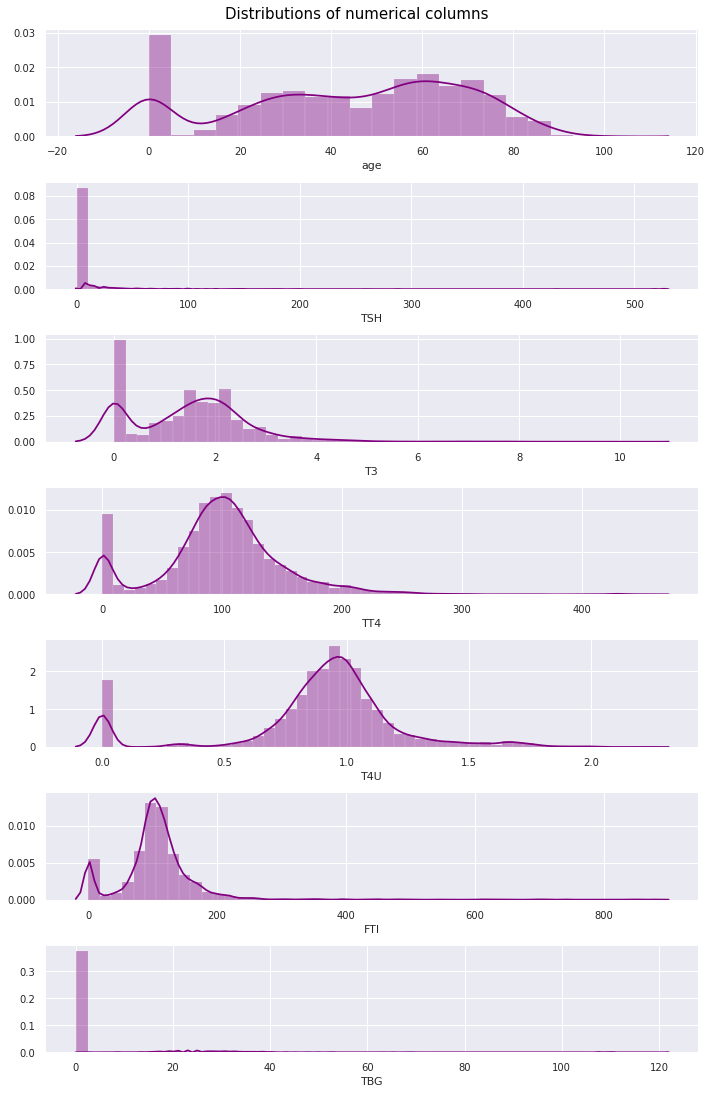

In [65]:
# DISTRIBUTION PLOTS  for numerical columns 
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(numeric_cols), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, numeric_cols):
  sns.distplot(df[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

- Most columns have a normal distribution mostly being bi-modal and trimodal. 

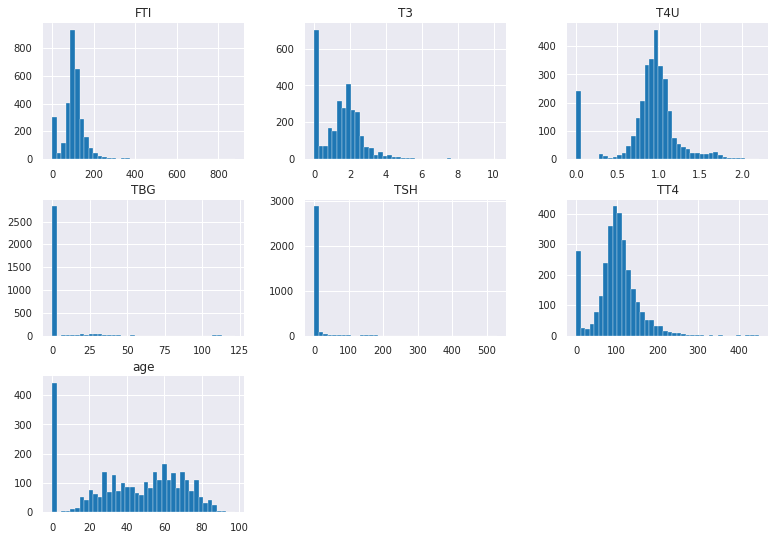

In [66]:

# Histograms
df.hist(bins=40, figsize=(13,9))
plt.show()

- Most of the columns are skwed to the right. 

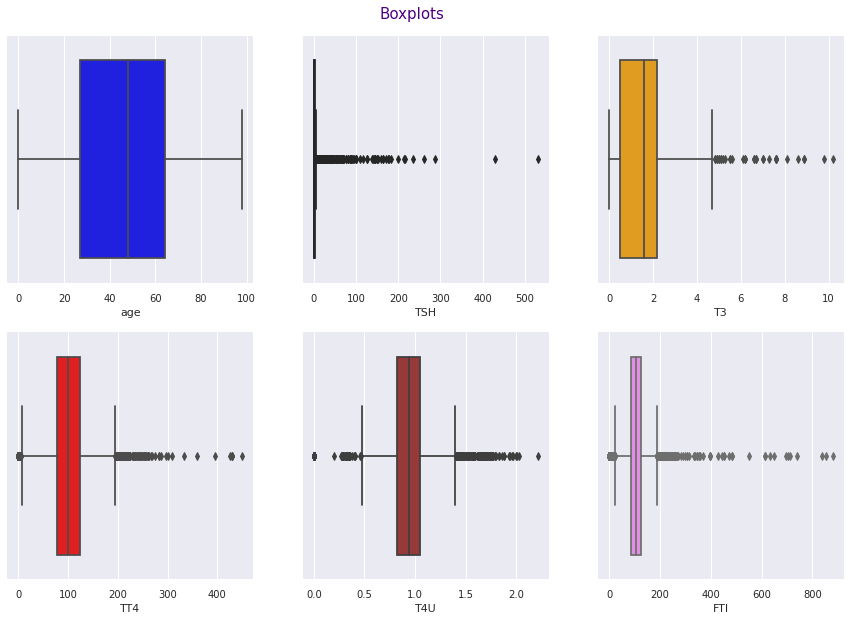

In [67]:
# BOXPLOTS 

# Creating a list of columns to check for outliers
# Creating a list of colors

numeric_cols

colors = ['blue', 'green', 'orange', 'red', 'brown', 'violet', 'purple']

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, numeric_cols, colors):
  sns.boxplot(df[column], ax = ax, color = color)

- All the other numerical columns have outliers except for the age column. We will however not drop any outliers as they may be true observations as they were recorded. 

##Bivariate Analysis

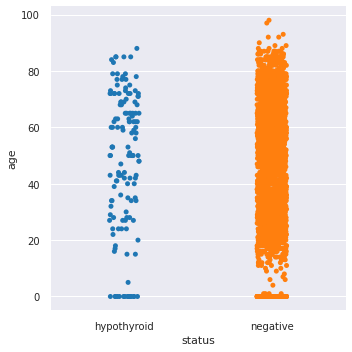

In [68]:
# Plotting our categorical data
sns.catplot('status', 'age', data=df)

- Most of the patients(respondents) with hypothyroid were between ages 0-86, while those that tested negative were between ages 0-98

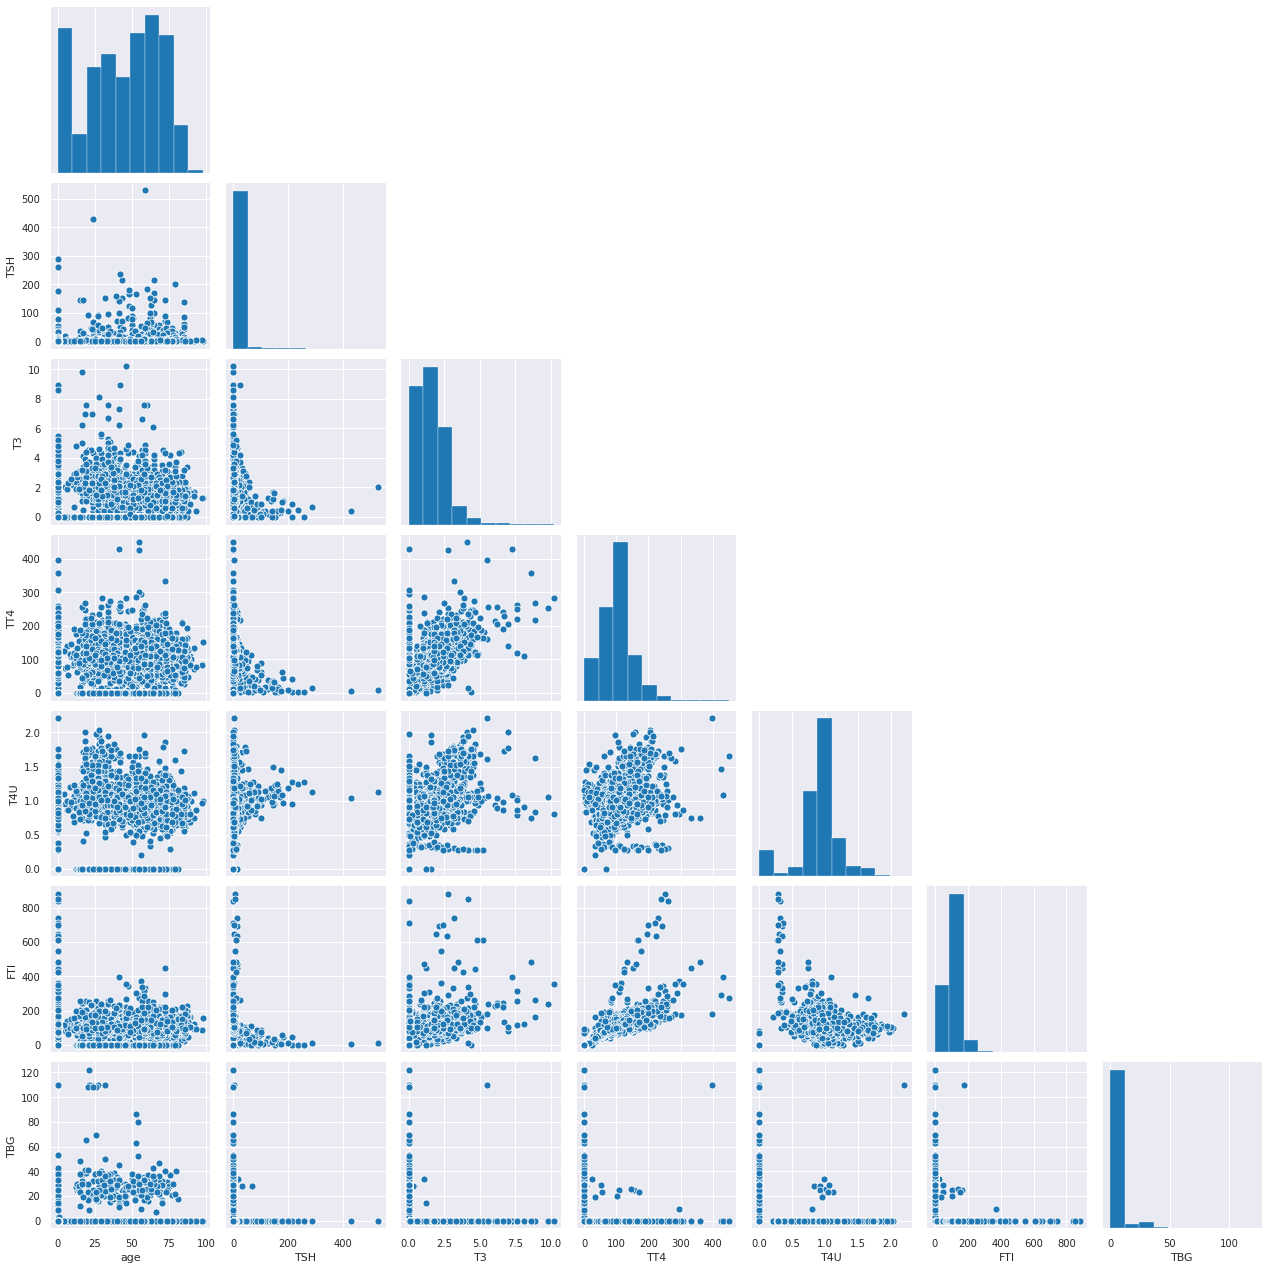

In [69]:
sns.pairplot(df, corner = True)

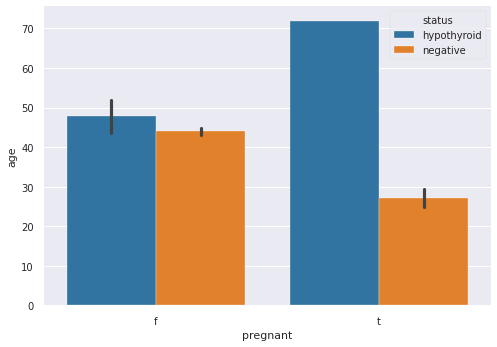

In [70]:
sns.barplot(x= 'pregnant', y = 'age', data = df, hue='status')

- A higher number of  the patients that were pregnant tested positive for hypothyroid as compared to those that were not. 

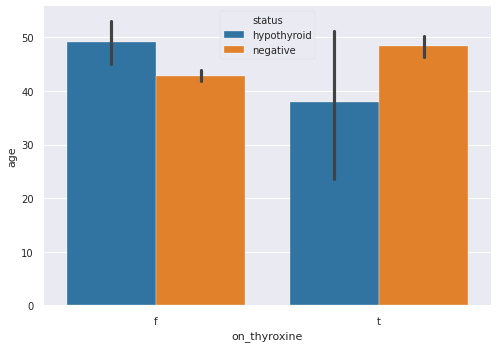

In [71]:
sns.barplot(x= 'on_thyroxine', y = 'age', data = df, hue='status')

- A higher number of patients on thyroxine tested negeative for hypothyroid whereas a higher number of patients who were not on thyroxine tested positive for hypothyroid. 

In [ ]:
df.columns

In [72]:
# Manually encoding categorical features. Using  label ancoder wasn't just working for me they way I wanted it to. 
new_data = {"sex": {"M": 1, "F": 0},'on_thyroxine': {"t": 1, "f": 0}, "query_on_thyroxine": {"t": 1, "f": 0},
             "on_antithyroid_medication": {"t": 1, "f": 0}, "thyroid_surgery": {"t": 1, "f": 0},
             "query_hypothyroid": {"t": 1, "f": 0}, "query_hyperthyroid": {"t": 1, "f": 0}, "pregnant": {"t": 1, "f": 0},
             "sick" : {"t": 1, "f": 0}, "tumor": {"t": 1, "f": 0}, "lithium": {"t": 1, "f": 0}, "goitre": {"t": 1, "f": 0},
             "TSH_measured": {"y": 1, "n": 0}, "T3_measured": {"y": 1, "n": 0}, "TT4_measured": {"y": 1, "n": 0},
             "T4U_measured": {"y": 1, "n": 0}, "FTI_measured": {"y": 1, "n": 0},"TBG_measured": {"y": 1, "n": 0},
                }
df.replace(new_data, inplace=True)

In [73]:
# checking to see whether changes were implimented
df.head(
2    
)

# Yes, changes have been implemented.

status   age  sex  on_thyroxine  ...  FTI_measured   FTI  TBG_measured  TBG
0  hypothyroid  72.0    1             0  ...             1  10.0             0  0.0
1  hypothyroid  15.0    0             1  ...             1  17.0             0  0.0

[2 rows x 26 columns]

#6.Solution Implementation

##i) Random Forest 

In [74]:
X = df.drop('status', axis = 1)
y = df.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.sample(10)

Actual    Predicted
686      negative     negative
900      negative     negative
1525     negative     negative
1684     negative     negative
447      negative     negative
2233     negative     negative
1171     negative     negative
489      negative     negative
30    hypothyroid  hypothyroid
2054     negative     negative

In [75]:
a= metrics.accuracy_score(y_test, y_pred)
print('accuracy sscore is: ', a)

accuracy sscore is:  0.9956803455723542


###Hyperparameter tuning 

In [76]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
# n estimaors= 100 implies that our parametres can only be up to 100
kfold = KFold(n_splits=10, shuffle= True)

params = {'n_estimators' : [10, 20, 30, 50, 100], 
          'max_depth' : [1, 2, 3, 4, 5]}


forest = RandomForestClassifier()

search = GridSearchCV(forest, param_grid=params, scoring = 'accuracy', cv = kfold)

search.fit(X, y)
search.best_params_

{'max_depth': 5, 'n_estimators': 30}

- shuffle = True controls the randomness of each fold

- when kfold is without shuffle best params are {'max_depth': 1, 'n_estimators': 10}, with shuffle {'max_depth': 5, 'n_estimators': 30}. Decided to go with kfold with shuffle= True


In [78]:
forest = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', max_depth = 5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Evaluating the model performance
b = metrics.accuracy_score(y_test, y_pred) 

print('Accuracy score is: ', b)

Accuracy score is:  0.9946004319654428


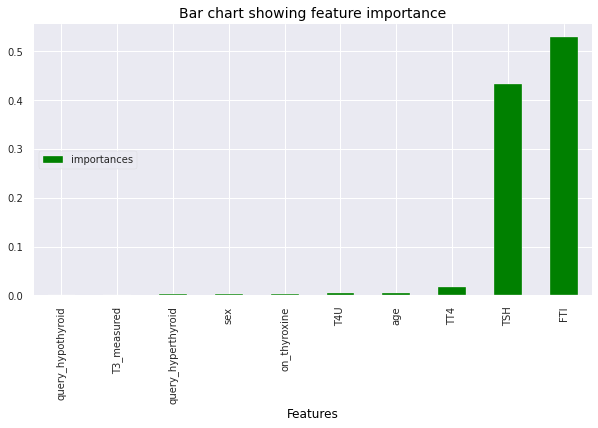

In [79]:

# Checking for the most important features that contribute most in predicting the target


rand_tree = forest.estimators_[2]
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
impo_df = pd.DataFrame({'Features': X.columns, 'importances':rand_tree.feature_importances_}).sort_values(by='importances', ascending=False).set_index('Features')

# Creating a bar chart of feature importance in descending order
impo_df = impo_df[:10].sort_values(by = 'importances', ascending = True)
impo_df.plot(kind = 'bar', figsize = (10,5), color = 'green')
plt.legend(loc = 'center left')
plt.title('Bar chart showing feature importance', color = 'black', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'black')
plt.show()


- The most important features with the Random Forest are TSH and FTI

###Adaboost

In [80]:
from sklearn.tree import DecisionTreeRegressor
#ada_boost = AdaBoostClassifier(DecisionTreeRegressor(max_depth = 4),
 #                         n_estimators=300, random_state = 0)

#ada_boost = ada_boost.fit(X_train, y_train)
# ada_pred = ada_boost.predict(X_test)

ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [81]:
print("Accuracy score is :", metrics.accuracy_score(y_test, ada_pred))

Accuracy score is : 0.9924406047516199


- The accuracy score decreases as compared to the Random Forest accuracy i.e. 99.35% to 99.24%. 

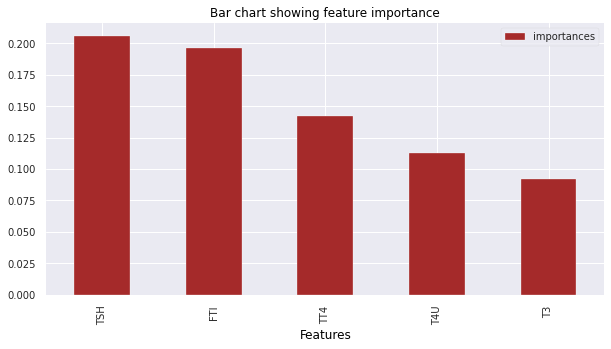

In [82]:
#********
# Checking for the most important features 
# Creating a dataframe of features and their respective importances
ada_df = pd.DataFrame({'Features': X.columns, 'importances':ada_boost.feature_importances_}).sort_values(by='importances', ascending=False).set_index('Features')

# Creating a bar chart of feature importance in descending order
ada_df = ada_df[:5].sort_values(by = 'importances', ascending = False)
ada_df.plot(kind = 'bar', figsize = (10,5), color = 'brown')
plt.legend(loc = 'left')
plt.title('Bar chart showing feature importance', color = 'black', fontsize = 12)
plt.xlabel('Features', fontsize = 12, color = 'black')
plt.show()


- The most important factors with adaboost are TSH, FTI, TT4, T4U and T3.
- Now we realise that the most important features with ada boost differ as compared to those with the Random Forest Regressor, except for TSH and FTI

##ii)Support Vector Machine

- From the Random Forest and boosted model, we find that FTI and TSH have the hihgest importance. So we use those as our independent variables 


In [89]:
X = df[['FTI', 'TSH']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of models and model names 
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Feature scaling 
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  return acc, model

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]}')

The accuracy score of Polynomial is: 0.9827213822894169
The accuracy score of Linear     is: 0.9794816414686826
The accuracy score of Rbf        is: 0.9848812095032398


- The linear model in this case has the lowest accuracy score. 

#7.Challenging the solution

In [90]:
# After getting your best performing kernel, use this kernel together with your tuned parameters and 
# repeat the prediction but this time using additional features. Compare the model you've just created 
# with the 2-features version. 

X = df[['FTI', 'TSH', 'TT4', 'T4U','thyroid_surgery']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# models for iteration
#

linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')
poly = SVC(kernel='poly')


# Creating a list of the models and model names
#
models = [linear,rbf,poly]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Feature scaling 
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Accuracy of the model

  acc = accuracy_score(y_test, y_pred)
  
  return acc, model

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]}')

The accuracy score of Polynomial is: 0.9838012958963283
The accuracy score of Linear     is: 0.9870410367170627
The accuracy score of Rbf        is: 0.9859611231101512


- The more  features added to the model Increases the accuracy of the models slightly.  
- The accuracy of the Linear model however increases *significantly* 
with increase in the number of variables 